****Project: Investigate a Dataset -tmdb-movies.csv****

**Introduction**

**Dataset Description**

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

**Question(s) for Analysis**

1-Movie Name for Each Genres which have the highest Voting Value 

2-The most years of issuance of films?

3-Is there a relationship between budget and Revenue?

4-What are the top 20 films whose profits did not cover their budget?

5- Number of Movie for each geners

**Importing The Nessery Lbraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimpy import clean_columns,skim



# 1 - Data Wrangling and Discovring

In [74]:
#loading The Data 
df_movie = pd.read_csv(r"D:\Introduction To Data Analysis Python Udacity Project\tmdb-movies.csv")
df_movie.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09


In [75]:
# Take a look to the columns in our dataset 
df_movie.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [77]:
df_movie.shape

(10866, 21)

In [76]:
# Get Some Basic Information about Data
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [78]:
df_movie.duplicated().sum()

1

In [79]:
#Find null values

df_movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [80]:
#Know the datatypes
df_movie.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

# 2 - Data Cleaning

In [81]:
#Spliting coulmns to take only the first value 
df_movie.genres=df_movie.genres.str.split("|").str.get(0)
df_movie.production_companies=df_movie.production_companies.str.split("|").str.get(0)
#Check the changes now
df_movie.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


In [48]:
# Drop Duplication 
df_movie.drop_duplicates()
df_movie.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09


In [82]:
# 1 Drop Extraneous Columns
df_movie.drop(['homepage', 'imdb_id', 'tagline', 'vote_count','overview'], axis=1, inplace=True)

# confirm changes
df_movie.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios,6/9/2015,6.5,2015,137999939.3,1.392446e+09


In [50]:
#Replace null values
df_movie[["genres","production_companies","original_title","keywords","director","cast"]]= df_movie[["genres","production_companies","original_title","keywords","director","cast"]].fillna('|')

#Check the changes now
df_movie.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [83]:
# Detect Outliers

df_movie.describe().round(2)

,id,popularity,budget,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,1.086600e+04,1.086600e+04,10866.00,10866.00,10866.00,1.086600e+04,1.086600e+04
mean,66064.18,0.65,1.462570e+07,3.982332e+07,102.07,5.97,2001.32,1.755104e+07,5.136436e+07
std,92130.14,1.00,3.091321e+07,1.170035e+08,31.38,0.94,12.81,3.430616e+07,1.446325e+08
min,5.00,0.00,0.000000e+00,0.000000e+00,0.00,1.50,1960.00,0.000000e+00,0.000000e+00
25%,10596.25,0.21,0.000000e+00,0.000000e+00,90.00,5.40,1995.00,0.000000e+00,0.000000e+00
50%,20669.00,0.38,0.000000e+00,0.000000e+00,99.00,6.00,2006.00,0.000000e+00,0.000000e+00
75%,75610.00,0.71,1.500000e+07,2.400000e+07,111.00,6.60,2011.00,2.085325e+07,3.369710e+07
max,417859.00,32.99,4.250000e+08,2.781506e+09,900.00,9.20,2015.00,4.250000e+08,2.827124e+09


### NOTE !!

At the average value, the MAX, and the MIN, we find the large and clear difference, which indicates the presence of these Extreme values or Outliers in the data that we have a value.

In [84]:
#count of unique values of genres

df_movie['genres'].value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               381
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: genres, dtype: int64

In [85]:
#count of unique values of production_companies

df_movie['production_companies'].value_counts()


Universal Pictures                        460
Paramount Pictures                        426
Columbia Pictures                         271
Twentieth Century Fox Film Corporation    242
Walt Disney Pictures                      214
                                         ... 
CorazÃ³n International                      1
Premise Media Corporation                   1
Fox                                         1
Symposium Productions                       1
Norm-Iris                                   1
Name: production_companies, Length: 3057, dtype: int64

**Check Consistency And Validity**

let's Check the Revenue & Budget values are = 0  

In [86]:
df_movie[(df_movie.budget == 0) & (df_movie.revenue == 0)]
print("Data After Removing Rows With Budget And Revenue Value = 0 : ")
df_movie.head(3)

Data After Removing Rows With Budget And Revenue Value = 0 : 


,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios,6/9/2015,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures,5/13/2015,7.1,2015,137999939.3,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure,Summit Entertainment,3/18/2015,6.3,2015,101199955.5,2.716190e+08


In [88]:
# Drop Inconsistent Or Noisy  
df_movie.drop(df_movie[(df_movie.budget == 0) & (df_movie.revenue == 0)].index,inplace=True)

# confirm changes
print("Data Shape After Removing Rows With Budget And Revenue Value = 0 : ")
df_movie.shape

Data Shape After Removing Rows With Budget And Revenue Value = 0 : 


(6165, 16)

In [89]:
#check Rntime values 
df_movie[df_movie['runtime']==0]


,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
1289,286372,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,kidnapping|brutality|violence|teenager|discovery,0,Thriller,Tiberius Film,10/20/2014,3.4,2014,2993545.915,0.0
4063,28004,0.371510,6000000,0,Madea's Family Reunion,Tyler Perry|Blair Underwood|Lynn Whitfield|Bor...,Tyler Perry,NaN,0,Comedy,NaN,1/25/2002,5.9,2002,7273568.362,0.0
6383,26985,0.371630,2000000,0,The 12 Dogs of Christmas,Jordan-Claire Green|Tom Kemp|Susan Wood|Adam H...,Kieth Merrill,holiday,0,Drama,NaN,11/1/2005,4.7,2005,2233126.579,0.0


In [90]:
# Drop Rows Where Runtime = 0 
df_movie.drop(df_movie[df_movie['runtime']==0].index,inplace=True)
#Confirm Change
df_movie.shape # Three Rows Was Deleted 

(6162, 16)

In [91]:
df_movie['budget'] = df_movie['budget'].replace(0, df_movie['budget'].mean()) 

# confirm changing 
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
count,6162.000000,6162.000000,6.162000e+03,6.162000e+03,6162.000000,6162.000000,6162.000000,6.162000e+03,6.162000e+03
mean,48260.105972,0.909683,2.995320e+07,7.022398e+07,106.503408,6.039662,2000.982798,3.094727e+07,9.057533e+07
std,75472.172674,1.240976,3.567338e+07,1.483474e+08,23.040723,0.871989,11.918501,4.075390e+07,1.825870e+08
min,5.000000,0.001117,1.000000e+00,0.000000e+00,4.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9289.250000,0.322325,8.000000e+06,1.201550e+05,93.000000,5.500000,1994.000000,2.374361e+06,1.193727e+05
50%,13718.500000,0.570599,2.500000e+07,1.657212e+07,102.500000,6.100000,2004.000000,1.622504e+07,2.335706e+07
75%,48277.500000,1.050665,3.300000e+07,7.147409e+07,116.000000,6.600000,2010.000000,4.206600e+07,9.529608e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


# 2 - Exploratory Data Analysis

In [93]:
# a function to plot the relation between two given columns.
def rela(col1,col2):
    return sns.lmplot(x=col1, y=col2, data=df_movie, aspect=20/15)


In [94]:
# Descovring The Relationships among the Variables 
df_movie.corr()

,id,popularity,budget,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.097876,-0.070762,-0.056789,-0.048941,-0.052492,0.498503,-0.163374,-0.119097
popularity,0.097876,1.000000,0.477903,0.643209,0.188399,0.286257,0.145966,0.453350,0.580509
budget,-0.070762,0.477903,1.000000,0.696352,0.242108,0.083850,0.197493,0.920178,0.559583
revenue,-0.056789,0.643209,0.696352,1.000000,0.217399,0.222252,0.098804,0.671490,0.910978
runtime,-0.048941,0.188399,0.242108,0.217399,1.000000,0.302652,-0.101545,0.301178,0.238796
vote_average,-0.052492,0.286257,0.083850,0.222252,0.302652,1.000000,-0.131052,0.091782,0.252425
release_year,0.498503,0.145966,0.197493,0.098804,-0.101545,-0.131052,1.000000,0.048440,-0.085354
budget_adj,-0.163374,0.453350,0.920178,0.671490,0.301178,0.091782,0.048440,1.000000,0.597269
revenue_adj,-0.119097,0.580509,0.559583,0.910978,0.238796,0.252425,-0.085354,0.597269,1.000000


### Research Question 1 (Movie Name for Each Genres which have the highest Voting Value )

In [95]:
df_movie.groupby('genres').apply(lambda x : x.sort_values(by = 'vote_average', ascending = False).head(1).reset_index(drop = True))


,,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,,,,,,,,,
Action,0,331214,0.537593,2.578897e+07,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,Phil Alden Robinson|Richard Loncraine|Mikael S...,world war ii|us army|war|paratroops|combat,705,Action,HBO,9/9/2001,8.0,2001,0.000000e+00,1.539360e+08
Adventure,0,1891,5.488441,1.800000e+07,538400000,The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,Irvin Kershner,rebel|asteroid|space battle|snow storm|space c...,124,Adventure,Lucasfilm,1/1/1980,8.0,1980,4.762866e+07,1.424626e+09
Animation,0,32085,0.391453,6.000000e+04,0,Vincent,Vincent Price,Tim Burton,boy|mama's boy|stop motion animation|one word ...,6,Animation,Walt Disney Productions,1/1/1982,7.9,1982,1.355785e+05,0.000000e+00
Comedy,0,13,6.715966,5.500000e+07,677945399,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,vietnam veteran|hippie|mentally disabled|runni...,142,Comedy,Paramount Pictures,7/6/1994,8.1,1994,8.091114e+07,9.973333e+08
Crime,0,414419,0.146477,3.000000e+07,0,Kill Bill: The Whole Bloody Affair,Uma Thurman|Lucy Liu|Vivica A. Fox|Daryl Hanna...,Quentin Tarantino,sword|martial law|revenge|wedding,247,Crime,Miramax Films,3/28/2011,8.1,2011,2.908194e+07,0.000000e+00
Documentary,0,24128,0.283191,1.200000e+06,4978922,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,concert,88,Documentary,Talking Heads,11/16/1984,8.4,1984,2.518850e+06,1.045097e+07
Drama,0,242575,0.054380,4.000000e+06,0,"Guten Tag, RamÃ³n",Adriana Barraza|RÃ¼diger Evers|Hector Kotsifak...,Jorge RamÃ­rez SuÃ¡rez,germany|mexican,119,Drama,Eficine 226,10/18/2013,8.4,2013,3.744133e+06,0.000000e+00
Family,0,110416,1.376670,2.578897e+07,857522,Song of the Sea,Brendan Gleeson|Fionnula Flanagan|David Rawle|...,Tomm Moore,fairy tale|lighthouse|folk music|lighthouse ke...,93,Family,Irish Film Board,9/6/2014,8.0,2014,0.000000e+00,7.898558e+05
Fantasy,0,497,2.719461,6.000000e+07,284600000,The Green Mile,Tom Hanks|Michael Clarke Duncan|David Morse|Bo...,Frank Darabont,southern u.s.|black people|mentally disabled|i...,189,Fantasy,Castle Rock Entertainment,12/10/1999,8.0,1999,7.854317e+07,3.725564e+08


## Conclusion
As we see above. This is a list of the best films for each genre based on rating value

### Research Question 2 (The most 10 years of issuance of films? )

<AxesSubplot:title={'center':'The most 10 years of issuance of films'}>

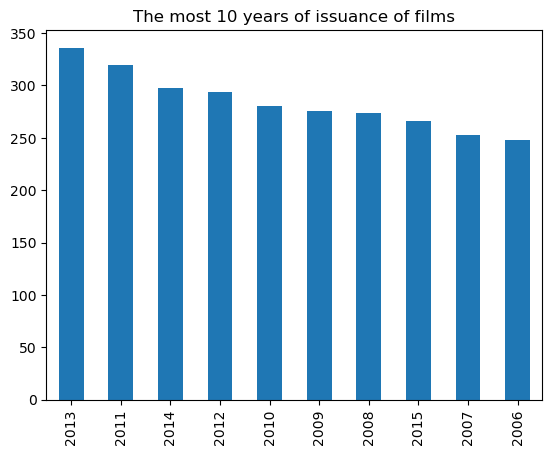

In [63]:
df_movie["cout_of_movie_per_year"] = df_movie.groupby(["release_year"])["original_title"].count()
df_movie["cout_of_movie_per_year"].sort_values(ascending=False).head(10).plot(kind="bar",title="The most 10 years of issuance of films")


### Research Question 3 (Is there a relationship between budget and Revenue? )

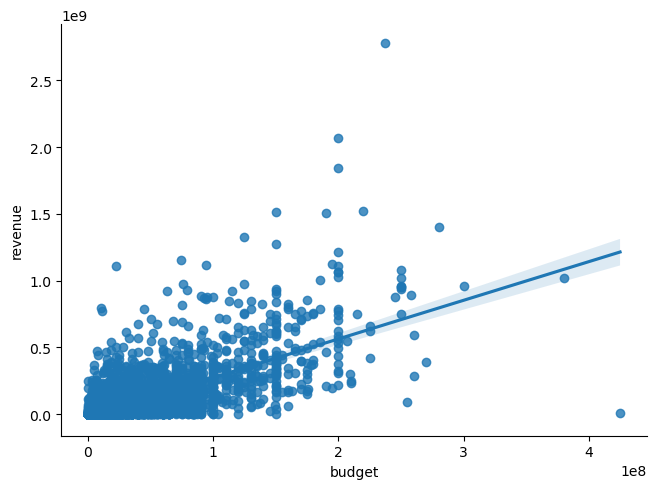

In [64]:
rela('budget','revenue') # Plotting the relationship between budgets and revenues

### conclusion

By looking at the Scatter plot , it is clear that there is a direct relationship between the two variables

### Research Question 4 ( What are the top 20 films whose profits did not cover their budget?)

In [65]:
df_movie["net_profit"]= df_movie["revenue"] - df_movie["budget"]
Unsuccessful_films= df_movie.loc[df_movie["net_profit"]<0,["original_title","genres","vote_average","director","production_companies","net_profit"]].sort_values(by="net_profit",ascending=True).head(20)
Unsuccessful_films

,original_title,genres,vote_average,director,production_companies,net_profit
2244,The Warrior's Way,Adventure,6.4,Sngmoo Lee,Boram Entertainment Inc.,-413912431.0
5508,The Lone Ranger,Action,6.0,Gore Verbinski,Walt Disney Pictures,-165710090.0
2069,The Wolfman,Horror,5.4,Joe Johnston,Universal Pictures,-150000000.0
2214,The Pacific,War,7.8,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,Playtone,-120000000.0
7031,The Alamo,Western,5.9,John Lee Hancock,Imagine Entertainment,-119180039.0
3484,Mars Needs Moms,Adventure,5.5,Simon Wells,Walt Disney Animation Studios,-111007242.0
2190,Double Wedding,Comedy,5.3,Craig Pryce,Jaffe / Braunstein Enterprise,-104002432.0
1696,Dragonball Evolution,Action,3.1,James Wong,Ingenious Film Partners,-100000000.0
4970,Brother Bear,Animation,6.8,Aaron Blaise|Robert Walker,Walt Disney Pictures,-99999750.0
2435,The 13th Warrior,Adventure,6.2,John McTiernan,Touchstone Pictures,-98301101.0


<AxesSubplot:title={'center':'Unsuccessful_films'}>

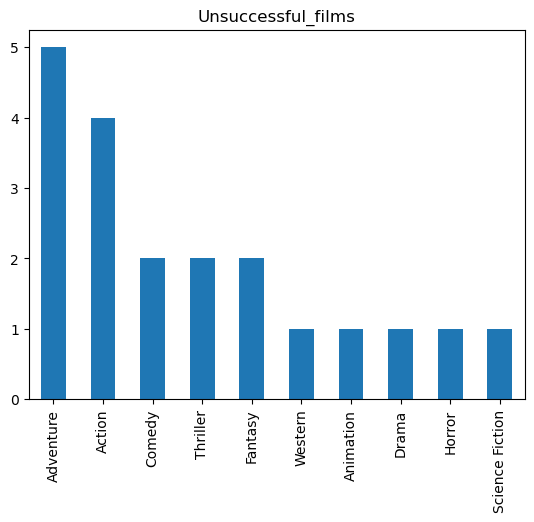

In [406]:
Unsuccessful_films["genres"].value_counts().plot(kind="bar",title="Unsuccessful_films")

### Conclusion 

If we look closely at the data of the top 20 films that the return did not cover the spent budget, we will find that most of them are of the Adventure and Action genres.
Although the Voting value in most of these films exceeds the vote_average

Which makes us reconsider the accuracy of the relationship between the vote_average and the net_profit value

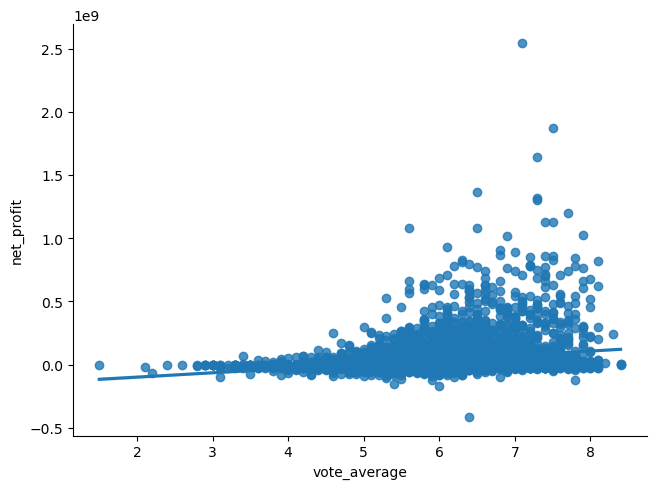

In [73]:
# Check the Relationship Between vote_average and net_profit
rela("vote_average","net_profit")

### Research Question 5 (  Number of Movie for each geners)

<AxesSubplot:title={'center':'Number of Movie for each geners'}>

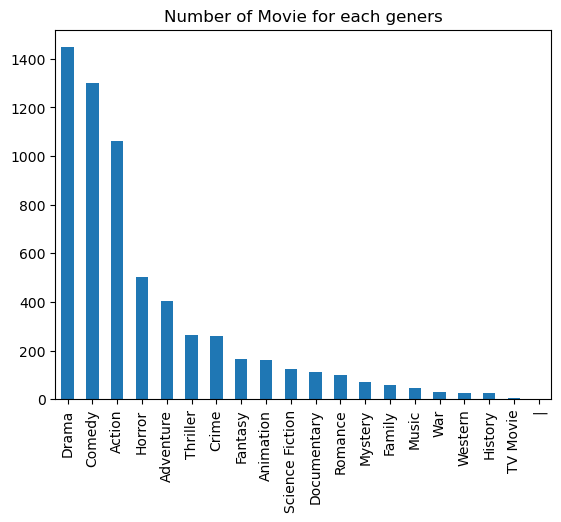

In [67]:
 df_movie['genres'].value_counts().plot(kind="bar",title="Number of Movie for each geners")

## Conclusions

* When looking at the data, you will find that most of the films are of the dramatic type, followed by the comedies.

* Although action films occupy the third place in terms of the number of films, they occupy the second place in unsuccessful films, as the Revenue from them did not cover the budget.

* There is a significant positive direct relationship between the budget and the return, as it is approximately equal to 0.6.

* The average vote based on the data, we find that it does not clearly affect the success of the films, as the top 20 films in terms of lack of success, we find that the average vote in them is high, which makes us reconsider about this relationship or about the accuracy of the data in the first place

In [71]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295